# German Project Analysis: Biowaste and Food Waste

In [2]:
# load libraries
library(ggplot2)
library(tidyverse)
library(GGally)
library(VIM)
library(reshape2)
library(gridExtra)
library(missForest)
library(rpart)
library(randomForest)
library(caret)
library(ranger)
library(rpart.plot)
library(gbm)
library(MASS)
library(Benchmarking)
library(xgboost)

In [48]:
theme_set(theme_minimal())

## 1. Data preparation, imputation, and vizualization

In [4]:
# Read in data
df <- read.csv("GermanClean4.csv", na.strings="")

In [5]:
df2 <- dplyr::select(df,SFP_m3perTonWasteIn:Dewatering,MarketedCompost_tpy,MarketedLiqDig_tpy)

In [6]:
# Output as factor
df2$SFP_m3perTonWasteIn <- as.factor(df2$SFP_m3perTonWasteIn)

# Waste types as factors
df2$Present_Other <- as.factor(df2$Present_Other)
df2$Present_Manure <- as.factor(df2$Present_Manure)
df2$Present_FW <- as.factor(df2$Present_FW)
df2$Present_IBW <- as.factor(df2$Present_IBW)
df2$Present_GW <- as.factor(df2$Present_GW)
df2$Present_BW <- as.factor(df2$Present_BW)

# Digester technology type as factor
df2$Digester_Box <- as.factor(df2$Digester_Box)
df2$Digester_PlugFlow <- as.factor(df2$Digester_PlugFlow)
df2$Digester_WetFerm <- as.factor(df2$Digester_WetFerm)
df2$Digester_Other <- as.factor(df2$Digester_Other)
df2$Digester_SingleStage <- as.factor(df2$Digester_SingleStage)

# Temperature as factor
df2$Temp_Meso <- as.factor(df2$Temp_Meso)

# Pre-treatment technologies as factor
df2$Pre_Crushing <- as.factor(df2$Pre_Crushing)
df2$Pre_Screening <- as.factor(df2$Pre_Screening)
df2$Pre_ManualSorting <- as.factor(df2$Pre_ManualSorting)
df2$Pre_MagneticSorting <- as.factor(df2$Pre_MagneticSorting)
df2$Pre_SubstanceSeparation <- as.factor(df2$Pre_SubstanceSeparation)
df2$Pre_SandRemoval <- as.factor(df2$Pre_SandRemoval)
df2$Pre_Slurrying <- as.factor(df2$Pre_Slurrying)
df2$Pre_Other <- as.factor(df2$Pre_Other)

# Pasteurization & dewatering
df2$Pasteurization <- as.factor(df2$Pasteurization)
df2$Dewatering <- as.factor(df2$Dewatering)

In [8]:
# str(df2)


 Variables sorted by number of missings: 
                Variable      Count
         ActualInput_tpy 0.19469027
     SFP_m3perTonWasteIn 0.13274336
              CoDigested 0.08849558
            Capacity_tpy 0.03539823
           Present_Other 0.00000000
          Present_Manure 0.00000000
              Present_FW 0.00000000
             Present_IBW 0.00000000
              Present_GW 0.00000000
              Present_BW 0.00000000
            Digester_Box 0.00000000
       Digester_PlugFlow 0.00000000
        Digester_WetFerm 0.00000000
          Digester_Other 0.00000000
    Digester_SingleStage 0.00000000
               Temp_Meso 0.00000000
            Pre_Crushing 0.00000000
           Pre_Screening 0.00000000
       Pre_ManualSorting 0.00000000
     Pre_MagneticSorting 0.00000000
 Pre_SubstanceSeparation 0.00000000
         Pre_SandRemoval 0.00000000
           Pre_Slurrying 0.00000000
               Pre_Other 0.00000000
          Pre_TotalSteps 0.00000000
          Pasteurizat

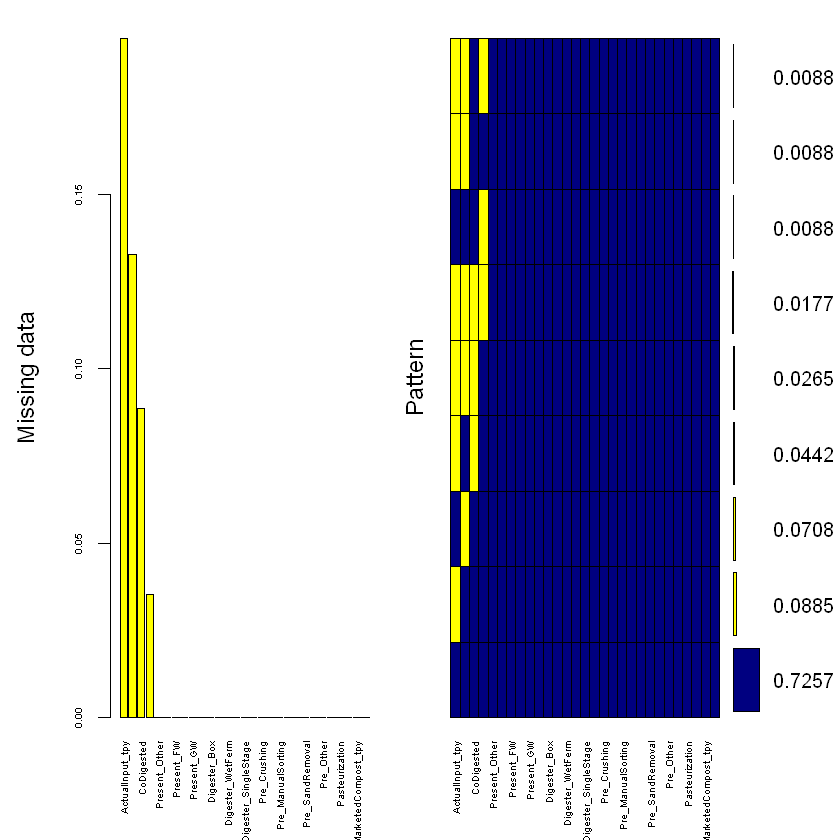

In [9]:
# Test for missing values and visualize  
missVals_plot <- aggr(df2, col=c('navyblue','yellow'),
                    numbers=TRUE, sortVars=TRUE,
                    labels=names(df2), cex.axis=.5,
                    gap=3, ylab=c("Missing data","Pattern"))

In [10]:
# Imputation of missing values with random forest
df_rfImp <- missForest(df2)
df2 <- df_rfImp$ximp

  missForest iteration 1 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 2 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 3 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 4 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 5 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 6 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 7 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 8 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 9 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!
  missForest iteration 10 in progress...

Warning message in randomForest.default(x = obsX, y = obsY, ntree = ntree, mtry = mtry, :
"The response has five or fewer unique values.  Are you sure you want to do regression?"

done!


In [11]:
df2$SFP_m3perTonWasteIn <- as.integer(df2$SFP_m3perTonWasteIn)
df2$CoDigested <- as.integer(df2$CoDigested)
df2$Pre_TotalSteps <- as.integer(df2$Pre_TotalSteps)
df2$MarketedCompost_tpy <- as.integer(df2$MarketedCompost_tpy)
df2$MarketedLiqDig_tpy <- as.integer(df2$MarketedLiqDig_tpy)

In [52]:
# # Visualize the distributions of our variables
# h1 <- ggplot(data = df2, aes(x = DigestCapacity)) + geom_histogram(binwidth=30000)
# h2 <- ggplot(data = df2, aes(x = ActualThroughput)) + geom_histogram(binwidth=30000)
# h3 <- ggplot(data = df2, aes(x = CodigestedWastes)) + geom_bar()
# h4 <- ggplot(data = df2, aes(x = Technology)) + geom_bar()
# h5 <- ggplot(data = df2, aes(x = Temp)) + geom_bar()
# h6 <- ggplot(data = df2, aes(x = DigStages)) + geom_bar()
# h7 <- ggplot(data = df2, aes(x = Dewatering)) + geom_bar()
# h8 <- ggplot(data = df2, aes(x = SFP)) + geom_bar()

# # Place the plot objects into a grid
# grid.arrange(h1,h2,h3,h4,h5,h6,h7,h8,ncol=4)

In [13]:
str(df2)

'data.frame':	113 obs. of  29 variables:
 $ SFP_m3perTonWasteIn    : int  2 2 3 4 4 2 3 3 2 4 ...
 $ CoDigested             : int  2 4 1 2 3 1 2 3 4 3 ...
 $ Present_Other          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 2 2 2 ...
 $ Present_Manure         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Present_FW             : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1 2 2 ...
 $ Present_IBW            : Factor w/ 2 levels "0","1": 1 2 1 2 2 1 1 1 1 2 ...
 $ Present_GW             : Factor w/ 2 levels "0","1": 2 2 1 1 2 1 2 2 2 1 ...
 $ Present_BW             : Factor w/ 2 levels "0","1": 2 2 1 1 2 2 2 2 2 1 ...
 $ Capacity_tpy           : num  18000 18000 85000 50000 20000 ...
 $ ActualInput_tpy        : num  13531 17800 30000 35000 14500 ...
 $ Digester_Box           : Factor w/ 2 levels "0","1": 2 1 1 1 1 2 1 1 1 1 ...
 $ Digester_PlugFlow      : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 2 2 1 1 ...
 $ Digester_WetFerm       : Factor w/ 2 levels "0","1": 1 2 2 2 1 1 1 1

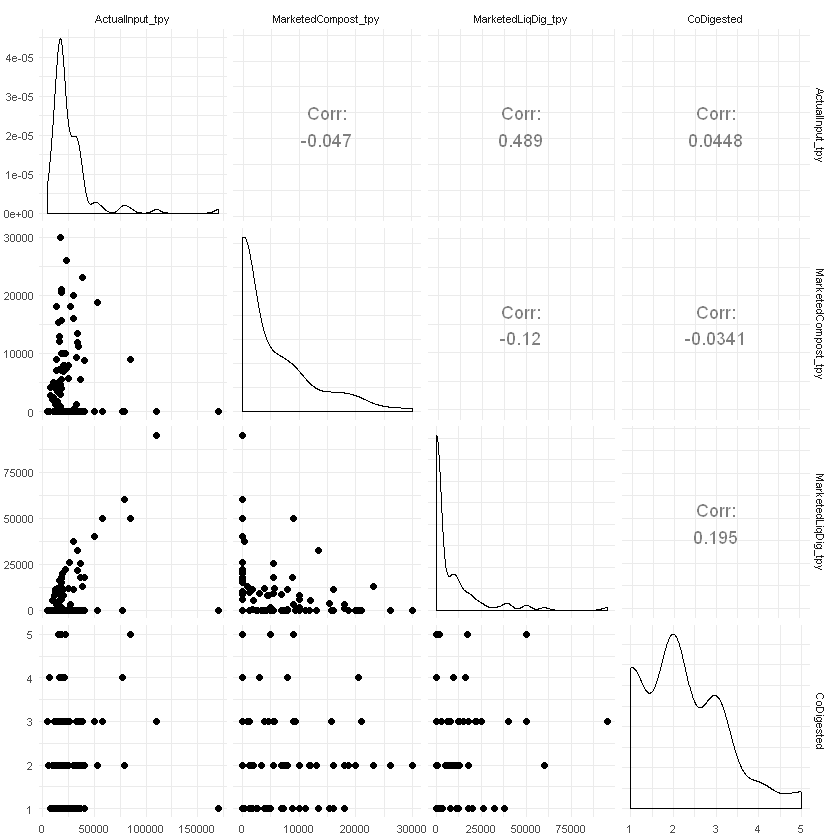

In [39]:
# Pairplot of selected variable:
ggpairs(dplyr::select(df2,ActualInput_tpy, MarketedCompost_tpy, MarketedLiqDig_tpy, CoDigested)) + theme_minimal(base_size = 8)
#can add a legend=2 arg

## 2. Two-stage DEA

In [17]:
# Define input and output matrices
x <- with(df2, cbind(ActualInput_tpy))
y <- with(df2, cbind(SFP_m3perTonWasteIn,MarketedCompost_tpy,MarketedLiqDig_tpy))

In [18]:
# Compute DEA efficiency
e <- dea(x,y)
summary(e)

Summary of efficiencies
The technology is vrs and input orientated efficiency
Number of firms with efficiency==1 are 15 
Mean efficiency: 0.562 
---                
  Eff range       #    %
  0<= E <0.1      2  1.8
  0.1<= E <0.2   16 14.2
  0.2<= E <0.3   13 11.5
  0.3<= E <0.4   12 10.6
  0.4<= E <0.5    8  7.1
  0.5<= E <0.6    7  6.2
  0.6<= E <0.7   13 11.5
  0.7<= E <0.8   11  9.7
  0.8<= E <0.9    9  8.0
  0.9<= E <1      7  6.2
        E ==1    15 13.3
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02824 0.27441 0.58167 0.56198 0.82295 1.00000 


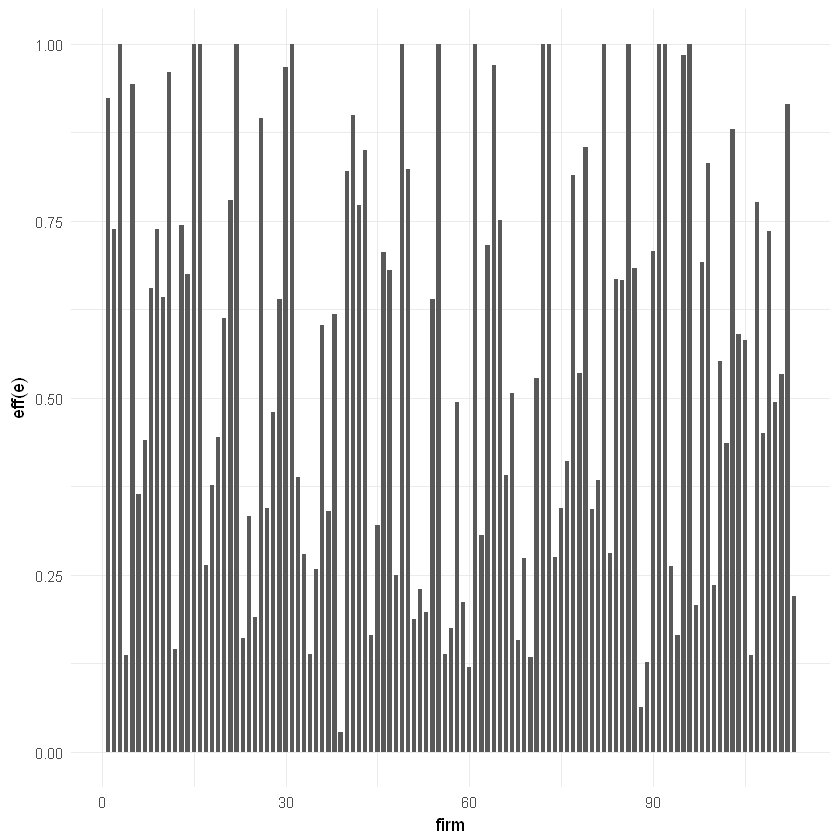

In [19]:
# Plot the efficiency scores 
test1 <- as.data.frame(eff(e))
test1$firm <- 1:113

ggplot(data=test1, aes(x=firm, y=eff(e))) +
    geom_bar(stat="identity", width=0.7)

In [20]:
# Input savings potential for each firm
(1-eff(e)) * x

ActualInput_tpy
1028.6250
4663.3333
0.0000
30200.0000
812.4985
8400.0000
16451.1169
12514.8167
1700.0000
11866.4324


In [21]:
# calculate slacks
el <- dea(x,y,SLACK=TRUE)
data.frame(e$eff,el$eff,el$slack,el$sx,el$sy)

e.eff,el.eff,el.slack,sx1,sy1,sy2,sy3
0.9239801,0.9239801,TRUE,0,1.1506250,0,0
0.7380150,0.7380150,TRUE,0,1.3166667,0,0
1.0000000,1.0000000,FALSE,0,0.0000000,0,0
0.1371429,0.1371429,FALSE,0,0.0000000,0,0
0.9439656,0.9439656,FALSE,0,0.0000000,0,0
0.3636364,0.3636364,TRUE,0,2.0000000,0,0
0.4401421,0.4401421,TRUE,0,0.3333333,0,0
0.6554291,0.6554291,FALSE,0,0.0000000,0,0
0.7384615,0.7384615,TRUE,0,2.0000000,0,0
0.6425989,0.6425989,FALSE,0,0.0000000,0,0


In [22]:
# Fully efficient units, eff==1 and no slack
which(eff(e) == 1 & !el$slack)

[1]  3 15 16 22 31 49 55 61 72 73 82 86 91 92 96

peer,#
3,21
16,91
22,18
31,41
55,9
72,6


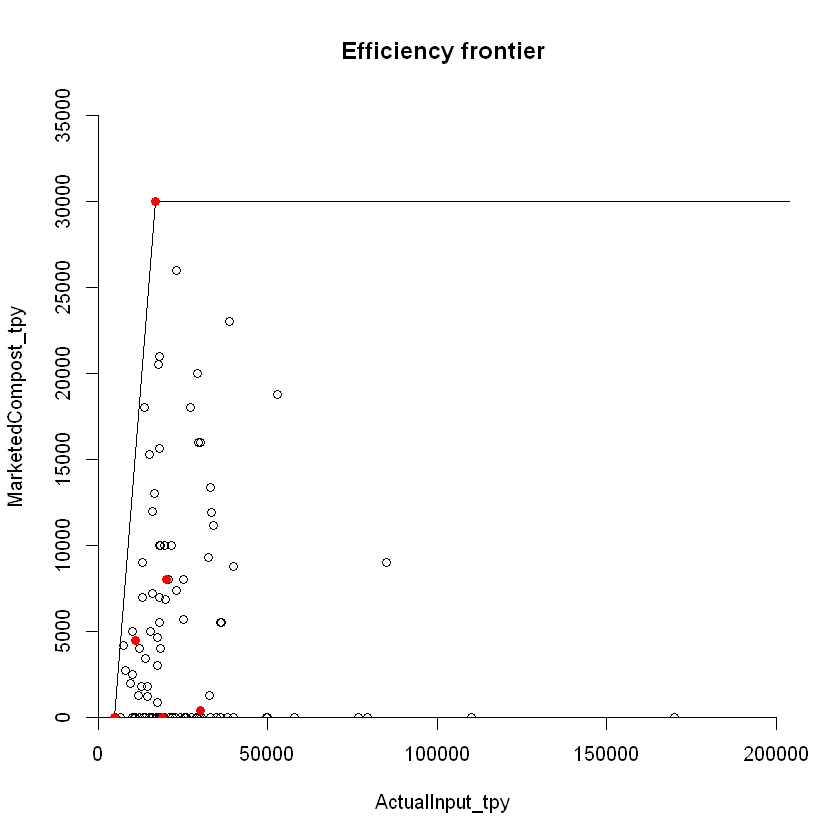

In [28]:
# Peer analysis
np <- get.number.peers(e)
np[which(np[,2]>5),]
inp <- np[which(np[,2]>5),1]
dea.plot(x[,1],y[,2], xlab="ActualInput_tpy", ylab="MarketedCompost_tpy")
points(x[inp,1], y[inp,2], pch=16, col="red")
title("Efficiency frontier")

In [31]:
# # DEA plot because not enough peers..!
# dea.plot(x[,1],y[,2], xlab="ActualInput_tpy", ylab="MarketedCompost_tpy")
# title("Efficiency frontier")

## Second-stage DEA regression

In [32]:
# Append efficiency scores
df2$efficiency <- e$eff

In [33]:
# Make the target variable efficiency in the 75th percentile
df3 <- df2 %>% mutate(Eff_High = case_when(efficiency >= 0.82295 ~ 1, efficiency < 0.82295 ~ 0))
df3$Eff_High <- as.factor(df3$Eff_High)

# Delete some variables to see effect of technology specifically 
df3$SFP_m3perTonWasteIn <- NULL
df3$efficiency <- NULL
df3$ActualInput_tpy <- NULL
df3$Capacity_tpy <- NULL
df3$MarketedCompost_tpy <- NULL
df3$MarketedLiqDig_tpy <- NULL

In [34]:
# We will use repeated cross-validation
fitControl <- trainControl(## 10-fold CV
                           method = "repeatedcv",
                           number = 10,
                           repeats = 10)

In [35]:
# We train a gbm model
set.seed(0)
rf_mod <- train(Eff_High ~ ., data = df3,
                 method = "gbm",
                trControl = fitControl,
                tuneLength=8)

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1147             nan     0.1000    0.0047
     2        1.1055             nan     0.1000   -0.0022
     3        1.0820             nan     0.1000    0.0025
     4        1.0702             nan     0.1000    0.0023
     5        1.0590             nan     0.1000    0.0012
     6        1.0509             nan     0.1000   -0.0095
     7        1.0406             nan     0.1000   -0.0049
     8        1.0220             nan     0.1000   -0.0052
     9        1.0186             nan     0.1000   -0.0013
    10        1.0104             nan     0.1000   -0.0003
    20        0.9703             nan     0.1000   -0.0014
    40        0.8856             nan     0.1000   -0.0033
    60        0.8495             nan     0.1000   -0.0029
    80        0.8044             nan     0.1000   -0.0018
   100        0.7785             nan     0.1000   -0.0030
   120        0.7529             nan     0.1000   -0.0032
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0958             nan     0.1000    0.0080
     2        1.0748             nan     0.1000    0.0043
     3        1.0750             nan     0.1000   -0.0086
     4        1.0548             nan     0.1000    0.0076
     5        1.0478             nan     0.1000   -0.0030
     6        1.0252             nan     0.1000    0.0020
     7        1.0130             nan     0.1000   -0.0011
     8        0.9946             nan     0.1000   -0.0034
     9        0.9848             nan     0.1000   -0.0026
    10        0.9748             nan     0.1000    0.0001
    20        0.8988             nan     0.1000   -0.0003
    40        0.8103             nan     0.1000   -0.0014
    60        0.7624             nan     0.1000   -0.0049
    80        0.7200             nan     0.1000   -0.0077
   100        0.6966             nan     0.1000   -0.0013
   120        0.6720             nan     0.1000   -0.0028
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0706             nan     0.1000    0.0123
     2        1.0497             nan     0.1000    0.0095
     3        1.0342             nan     0.1000    0.0041
     4        1.0142             nan     0.1000   -0.0046
     5        0.9948             nan     0.1000   -0.0006
     6        0.9817             nan     0.1000   -0.0054
     7        0.9796             nan     0.1000   -0.0038
     8        0.9682             nan     0.1000   -0.0012
     9        0.9733             nan     0.1000   -0.0097
    10        0.9559             nan     0.1000   -0.0028
    20        0.8449             nan     0.1000   -0.0031
    40        0.7202             nan     0.1000    0.0005
    60        0.6447             nan     0.1000   -0.0033
    80        0.5940             nan     0.1000   -0.0072
   100        0.5472             nan     0.1000   -0.0024
   120        0.5128             nan     0.1000   -0.0048
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0972             nan     0.1000    0.0016
     2        1.0926             nan     0.1000   -0.0059
     3        1.0560             nan     0.1000    0.0111
     4        1.0337             nan     0.1000    0.0077
     5        1.0194             nan     0.1000    0.0040
     6        1.0079             nan     0.1000    0.0012
     7        0.9900             nan     0.1000    0.0007
     8        0.9620             nan     0.1000    0.0047
     9        0.9438             nan     0.1000   -0.0039
    10        0.9296             nan     0.1000    0.0040
    20        0.8298             nan     0.1000   -0.0058
    40        0.7168             nan     0.1000   -0.0035
    60        0.6366             nan     0.1000   -0.0068
    80        0.5740             nan     0.1000   -0.0118
   100        0.5172             nan     0.1000   -0.0030
   120        0.4961             nan     0.1000   -0.0038
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0705             nan     0.1000    0.0065
     2        1.0458             nan     0.1000    0.0086
     3        1.0179             nan     0.1000    0.0070
     4        1.0054             nan     0.1000    0.0044
     5        0.9812             nan     0.1000    0.0016
     6        0.9629             nan     0.1000    0.0025
     7        0.9483             nan     0.1000    0.0035
     8        0.9326             nan     0.1000    0.0012
     9        0.9186             nan     0.1000    0.0043
    10        0.9070             nan     0.1000   -0.0006
    20        0.8131             nan     0.1000   -0.0078
    40        0.7066             nan     0.1000   -0.0069
    60        0.6422             nan     0.1000   -0.0085
    80        0.5759             nan     0.1000   -0.0089
   100        0.5143             nan     0.1000   -0.0035
   120        0.4775             nan     0.1000   -0.0021
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0950             nan     0.1000    0.0008
     2        1.0688             nan     0.1000   -0.0035
     3        1.0575             nan     0.1000    0.0039
     4        1.0401             nan     0.1000    0.0055
     5        1.0174             nan     0.1000    0.0081
     6        0.9947             nan     0.1000    0.0058
     7        0.9784             nan     0.1000    0.0011
     8        0.9524             nan     0.1000   -0.0004
     9        0.9496             nan     0.1000   -0.0062
    10        0.9330             nan     0.1000    0.0054
    20        0.8161             nan     0.1000   -0.0020
    40        0.7283             nan     0.1000   -0.0069
    60        0.6331             nan     0.1000   -0.0003
    80        0.5615             nan     0.1000   -0.0068
   100        0.5174             nan     0.1000   -0.0051
   120        0.4803             nan     0.1000   -0.0025
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0777             nan     0.1000    0.0050
     2        1.0564             nan     0.1000    0.0047
     3        1.0397             nan     0.1000   -0.0072
     4        1.0271             nan     0.1000    0.0046
     5        1.0063             nan     0.1000    0.0035
     6        0.9877             nan     0.1000   -0.0005
     7        0.9745             nan     0.1000    0.0045
     8        0.9641             nan     0.1000   -0.0015
     9        0.9577             nan     0.1000   -0.0082
    10        0.9412             nan     0.1000   -0.0020
    20        0.8240             nan     0.1000   -0.0058
    40        0.7082             nan     0.1000   -0.0023
    60        0.6372             nan     0.1000   -0.0077
    80        0.5856             nan     0.1000   -0.0034
   100        0.5318             nan     0.1000   -0.0074
   120        0.5044             nan     0.1000   -0.0083
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0850             nan     0.1000    0.0023
     2        1.0792             nan     0.1000   -0.0044
     3        1.0682             nan     0.1000   -0.0022
     4        1.0294             nan     0.1000    0.0010
     5        1.0253             nan     0.1000   -0.0050
     6        1.0042             nan     0.1000    0.0005
     7        0.9918             nan     0.1000    0.0048
     8        0.9820             nan     0.1000    0.0026
     9        0.9697             nan     0.1000    0.0024
    10        0.9538             nan     0.1000    0.0030
    20        0.8545             nan     0.1000   -0.0087
    40        0.7107             nan     0.1000    0.0009
    60        0.6506             nan     0.1000   -0.0029
    80        0.6050             nan     0.1000   -0.0017
   100        0.5610             nan     0.1000   -0.0027
   120        0.5198             nan     0.1000   -0.0089
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0735             nan     0.1000    0.0170
     2        1.0493             nan     0.1000    0.0045
     3        1.0281             nan     0.1000    0.0043
     4        1.0174             nan     0.1000   -0.0032
     5        1.0003             nan     0.1000    0.0029
     6        0.9831             nan     0.1000    0.0047
     7        0.9515             nan     0.1000    0.0031
     8        0.9357             nan     0.1000    0.0020
     9        0.9273             nan     0.1000    0.0008
    10        0.9117             nan     0.1000    0.0063
    20        0.8194             nan     0.1000   -0.0053
    40        0.7293             nan     0.1000   -0.0073
    60        0.6510             nan     0.1000   -0.0039
    80        0.5854             nan     0.1000   -0.0050
   100        0.5357             nan     0.1000   -0.0029
   120        0.4967             nan     0.1000   -0.0045
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0984             nan     0.1000    0.0010
     2        1.0887             nan     0.1000    0.0046
     3        1.0728             nan     0.1000    0.0031
     4        1.0619             nan     0.1000    0.0032
     5        1.0486             nan     0.1000    0.0060
     6        1.0391             nan     0.1000   -0.0021
     7        1.0229             nan     0.1000    0.0001
     8        1.0181             nan     0.1000   -0.0012
     9        1.0112             nan     0.1000    0.0005
    10        0.9983             nan     0.1000   -0.0045
    20        0.9172             nan     0.1000    0.0002
    40        0.8255             nan     0.1000   -0.0030
    60        0.7667             nan     0.1000   -0.0006
    80        0.7354             nan     0.1000   -0.0034
   100        0.7088             nan     0.1000   -0.0017
   120        0.6849             nan     0.1000   -0.0038
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0835             nan     0.1000    0.0095
     2        1.0707             nan     0.1000   -0.0072
     3        1.0408             nan     0.1000   -0.0008
     4        1.0285             nan     0.1000   -0.0010
     5        1.0084             nan     0.1000    0.0008
     6        0.9966             nan     0.1000   -0.0062
     7        0.9759             nan     0.1000    0.0040
     8        0.9625             nan     0.1000   -0.0003
     9        0.9477             nan     0.1000    0.0035
    10        0.9405             nan     0.1000   -0.0095
    20        0.8385             nan     0.1000    0.0016
    40        0.7327             nan     0.1000   -0.0036
    60        0.6543             nan     0.1000   -0.0036
    80        0.5864             nan     0.1000   -0.0007
   100        0.5405             nan     0.1000   -0.0024
   120        0.5048             nan     0.1000   -0.0017
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1068             nan     0.1000   -0.0112
     2        1.0660             nan     0.1000    0.0098
     3        1.0344             nan     0.1000    0.0045
     4        1.0196             nan     0.1000    0.0036
     5        0.9955             nan     0.1000    0.0037
     6        0.9744             nan     0.1000    0.0038
     7        0.9554             nan     0.1000    0.0033
     8        0.9463             nan     0.1000   -0.0016
     9        0.9391             nan     0.1000   -0.0067
    10        0.9187             nan     0.1000    0.0095
    20        0.8263             nan     0.1000   -0.0092
    40        0.6987             nan     0.1000   -0.0035
    60        0.6131             nan     0.1000   -0.0055
    80        0.5530             nan     0.1000   -0.0053
   100        0.5068             nan     0.1000   -0.0013
   120        0.4644             nan     0.1000   -0.0002
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0807             nan     0.1000   -0.0037
     2        1.0607             nan     0.1000    0.0090
     3        1.0268             nan     0.1000    0.0027
     4        0.9955             nan     0.1000    0.0083
     5        0.9865             nan     0.1000   -0.0013
     6        0.9697             nan     0.1000   -0.0048
     7        0.9597             nan     0.1000   -0.0003
     8        0.9404             nan     0.1000    0.0019
     9        0.9320             nan     0.1000   -0.0026
    10        0.9145             nan     0.1000    0.0038
    20        0.7993             nan     0.1000    0.0012
    40        0.6666             nan     0.1000   -0.0082
    60        0.5882             nan     0.1000   -0.0023
    80        0.5179             nan     0.1000   -0.0063
   100        0.4748             nan     0.1000   -0.0054
   120        0.4331             nan     0.1000   -0.0021
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0886             nan     0.1000    0.0121
     2        1.0720             nan     0.1000   -0.0003
     3        1.0455             nan     0.1000    0.0025
     4        1.0289             nan     0.1000    0.0046
     5        1.0068             nan     0.1000   -0.0154
     6        0.9941             nan     0.1000   -0.0023
     7        0.9681             nan     0.1000    0.0094
     8        0.9602             nan     0.1000   -0.0039
     9        0.9445             nan     0.1000    0.0018
    10        0.9258             nan     0.1000   -0.0035
    20        0.8204             nan     0.1000   -0.0024
    40        0.6988             nan     0.1000   -0.0032
    60        0.6199             nan     0.1000    0.0031
    80        0.5530             nan     0.1000   -0.0071
   100        0.5015             nan     0.1000   -0.0028
   120        0.4532             nan     0.1000   -0.0031
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0957             nan     0.1000   -0.0030
     2        1.0786             nan     0.1000    0.0081
     3        1.0593             nan     0.1000   -0.0038
     4        1.0379             nan     0.1000    0.0089
     5        1.0168             nan     0.1000    0.0056
     6        1.0025             nan     0.1000   -0.0070
     7        0.9790             nan     0.1000    0.0048
     8        0.9568             nan     0.1000    0.0024
     9        0.9372             nan     0.1000    0.0038
    10        0.9228             nan     0.1000    0.0030
    20        0.8263             nan     0.1000    0.0018
    40        0.6800             nan     0.1000   -0.0060
    60        0.6070             nan     0.1000   -0.0025
    80        0.5492             nan     0.1000   -0.0016
   100        0.5067             nan     0.1000   -0.0041
   120        0.4636             nan     0.1000   -0.0028
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.0864             nan     0.1000    0.0040
     2        1.0625             nan     0.1000    0.0110
     3        1.0296             nan     0.1000    0.0167
     4        1.0106             nan     0.1000    0.0075
     5        0.9821             nan     0.1000    0.0089
     6        0.9740             nan     0.1000   -0.0035
     7        0.9593             nan     0.1000   -0.0017
     8        0.9420             nan     0.1000    0.0011
     9        0.9299             nan     0.1000    0.0042
    10        0.9156             nan     0.1000    0.0032
    20        0.8001             nan     0.1000   -0.0020
    40        0.6760             nan     0.1000   -0.0136
    60        0.5928             nan     0.1000   -0.0026
    80        0.5326             nan     0.1000   -0.0071
   100        0.4761             nan     0.1000   -0.0014
   120        0.4323             nan     0.1000   -0.0001
   140        

Warning message in (function (x, y, offset = NULL, misc = NULL, distribution = "bernoulli", :
"variable 11: Digester_Other1 has no variation."

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.1086             nan     0.1000   -0.0078
     2        1.0896             nan     0.1000   -0.0022
     3        1.0709             nan     0.1000   -0.0014
     4        1.0364             nan     0.1000    0.0087
     5        1.0122             nan     0.1000    0.0082
     6        0.9956             nan     0.1000   -0.0010
     7        0.9800             nan     0.1000    0.0019
     8        0.9566             nan     0.1000   -0.0030
     9        0.9434             nan     0.1000   -0.0017
    10        0.9304             nan     0.1000    0.0014
    20        0.8420             nan     0.1000    0.0014
    40        0.7037             nan     0.1000   -0.0061
    60        0.6199             nan     0.1000    0.0029
    80        0.5576             nan     0.1000   -0.0086
   100        0.5136             nan     0.1000   -0.0010
   120        0.4512             nan     0.1000   -0.0037
   140        

In [36]:
# Model performance summary
rf_mod

Stochastic Gradient Boosting 

113 samples
 24 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 103, 101, 101, 102, 101, 103, ... 
Resampling results across tuning parameters:

  interaction.depth  n.trees  Accuracy   Kappa    
  1                   50      0.7605303  0.1074928
  1                  100      0.7501818  0.1318010
  1                  150      0.7521515  0.2011147
  1                  200      0.7503788  0.2173857
  1                  250      0.7500303  0.2292089
  1                  300      0.7527879  0.2485423
  1                  350      0.7418333  0.2258165
  1                  400      0.7429848  0.2354759
  2                   50      0.7496364  0.1463592
  2                  100      0.7709091  0.2452780
  2                  150      0.7715303  0.2815663
  2                  200      0.7654848  0.2735753
  2                  250      0.7608485  0.2710315
  2                  30

In [52]:
rf_mod$results

,shrinkage,interaction.depth,n.minobsinnode,n.trees,Accuracy,Kappa,AccuracySD,KappaSD
1,0.1,1,10,50,0.7605303,0.1074928,0.06291050,0.2356499
9,0.1,2,10,50,0.7496364,0.1463592,0.07858192,0.2572755
17,0.1,3,10,50,0.7637273,0.1894898,0.07811538,0.2738503
25,0.1,4,10,50,0.7657273,0.1872954,0.07614769,0.2701820
33,0.1,5,10,50,0.7683182,0.1973960,0.07858397,0.2758598
41,0.1,6,10,50,0.7652121,0.1872466,0.07170615,0.2600225
49,0.1,7,10,50,0.7699697,0.2082083,0.08161397,0.2828099
57,0.1,8,10,50,0.7694242,0.1941795,0.07503771,0.2628138
2,0.1,1,10,100,0.7501818,0.1318010,0.07748124,0.2658394
10,0.1,2,10,100,0.7709091,0.2452780,0.09147133,0.3079305


Warning message:
"Ignoring unknown aesthetics: shape"Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 8. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 16 rows containing missing values (geom_point)."

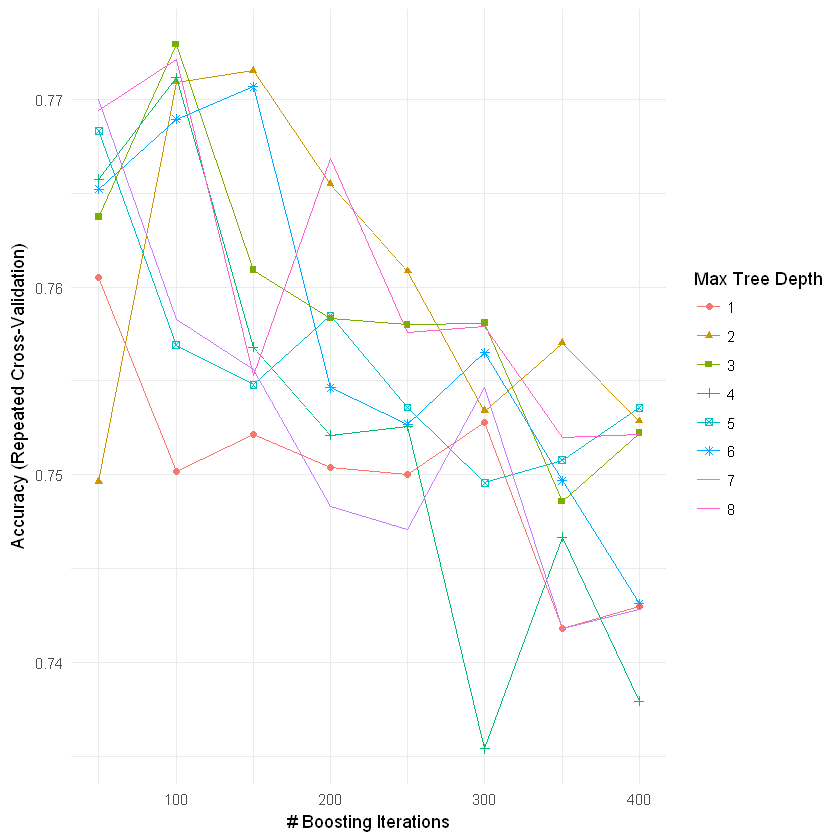

In [49]:
# Plot model training resutls
ggplot(rf_mod)

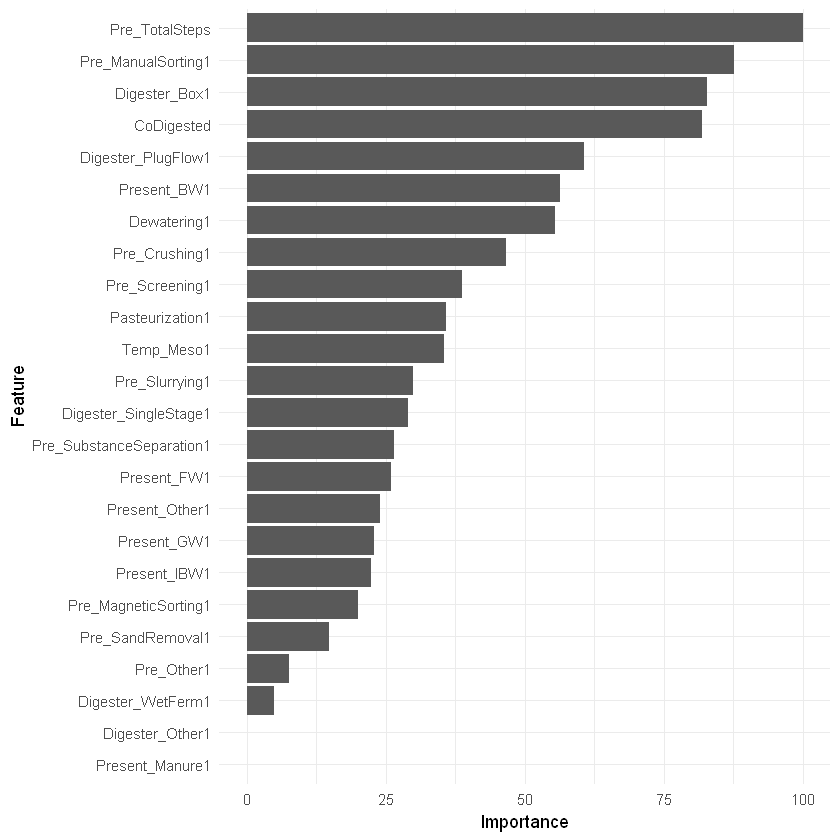

In [38]:
# Variable importance plot
ggplot(varImp(rf_mod))